In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape


(48895, 16)

In [4]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df["price"].describe()


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [7]:
df.isna().sum().sort_values(ascending=False).head(10)


last_review            10052
reviews_per_month      10052
host_name                 21
name                      16
id                         0
host_id                    0
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
dtype: int64

In [8]:
clean = df.copy()

# keep only valid prices and required fields
clean = clean.dropna(subset=["price", "neighbourhood_group", "room_type"])
clean = clean[clean["price"] > 0]

# remove extreme outliers for clearer plots (optional but helpful)
clean = clean[clean["price"] <= 1000]

clean.shape


(48645, 16)

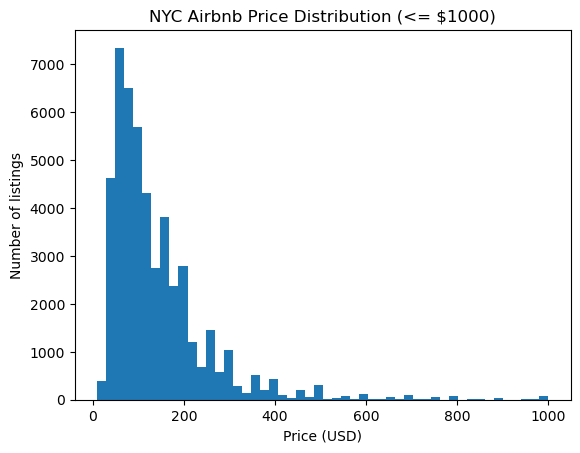

In [9]:
plt.hist(clean["price"], bins=50)
plt.xlabel("Price (USD)")
plt.ylabel("Number of listings")
plt.title("NYC Airbnb Price Distribution (<= $1000)")
plt.show()


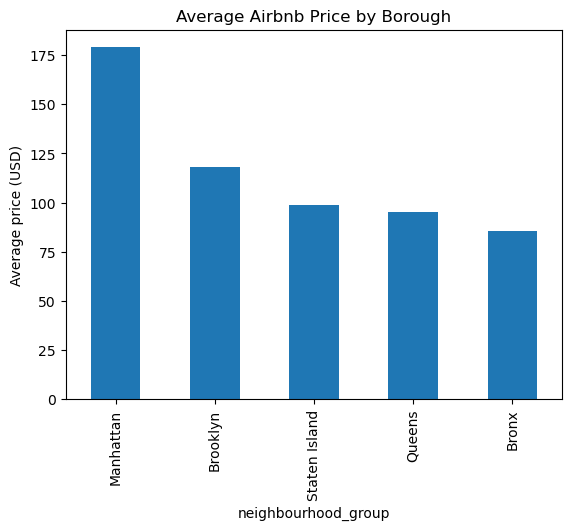

In [10]:
clean.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Average price (USD)")
plt.title("Average Airbnb Price by Borough")
plt.show()


In [ ]:
## Key Observations
- Prices are right-skewed: most listings are low-to-mid priced, with a smaller number of expensive listings.
- Average prices differ by borough, with Manhattan typically highest trailling off to Bronx.
- Filtering extreme outliers makes the overall pricing pattern clearer.
